In [1]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#Karthik imports
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [2]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### Read all Data
Read train data and the prediction data

In [2]:
data = pd.read_csv("~/Documents/Classes/W207/forest-cover-type-prediction/train.csv")
pd.set_option('display.max_columns',100)
#data_predict = pd.read_csv("covtype.data" , header = None)
#print ( data_predict.shape , data.shape)

### Data Split

Split the data into train , develop , predict . All EDA will be done on the train data.

In [3]:

X = np.array(data.as_matrix(columns=data.columns[1:55]))
Y = np.array(data["Cover_Type"].tolist())
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
train_df = data.iloc[shuffle,:].iloc[:12000 , :]
print('data shape: ', X.shape)
print('label shape:', Y.shape)
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

data shape:  (15120, 54)
label shape: (15120,)


/Users/krsrik/.venvs/opencv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### EDA

#### Step 1 : Describe the train data

In [5]:
display(train_df.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7552.348583,2750.038333,156.386250,16.484667,226.717833,51.04725,1714.994083,212.835417,219.175750,135.149333,1513.882667,0.239833,0.032750,0.419250,0.308167,0.023667,0.040833,0.064667,0.055917,0.010583,0.042417,0.0,0.0,0.000667,0.140583,0.026417,0.014667,0.032583,0.011083,0.0,0.006667,0.041250,0.004250,0.003167,0.009250,0.001250,0.022750,0.050250,0.017000,0.000083,0.003333,0.001167,0.000500,0.085667,0.048333,0.021917,0.044917,0.041750,0.001333,0.006667,0.000667,0.002417,0.047083,0.044250,0.030000,3.992917
std,4348.411146,417.599033,109.572253,8.447705,209.025877,60.92378,1328.634976,30.478846,22.806425,45.828141,1105.880884,0.426999,0.177989,0.493457,0.461755,0.152015,0.197912,0.245947,0.229770,0.102334,0.201546,0.0,0.0,0.025812,0.347606,0.160378,0.120220,0.177551,0.104697,0.0,0.081380,0.198876,0.065056,0.056186,0.095735,0.035335,0.149112,0.218469,0.129276,0.009129,0.057641,0.034138,0.022356,0.279883,0.214479,0.146418,0.207130,0.200026,0.036492,0.081380,0.025812,0.049102,0.211826,0.205659,0.170594,1.999550
min,3.000000,1863.000000,0.000000,0.000000,0.000000,-123.00000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3786.750000,2376.750000,65.000000,10.000000,67.000000,5.00000,756.500000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7570.500000,2753.000000,126.000000,15.000000,180.000000,32.00000,1310.000000,220.000000,223.000000,138.000000,1253.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Following is what we observe:
1. All fields are continous or binary. There are no text fields 
2. Soil_Type fields are binary
3. Wilderness Area fields are binary
4. Following are the fields which are continous : 'Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'

We create the scatter plots for the continous fields

#### Step 2 : Scatter plot for continous fields

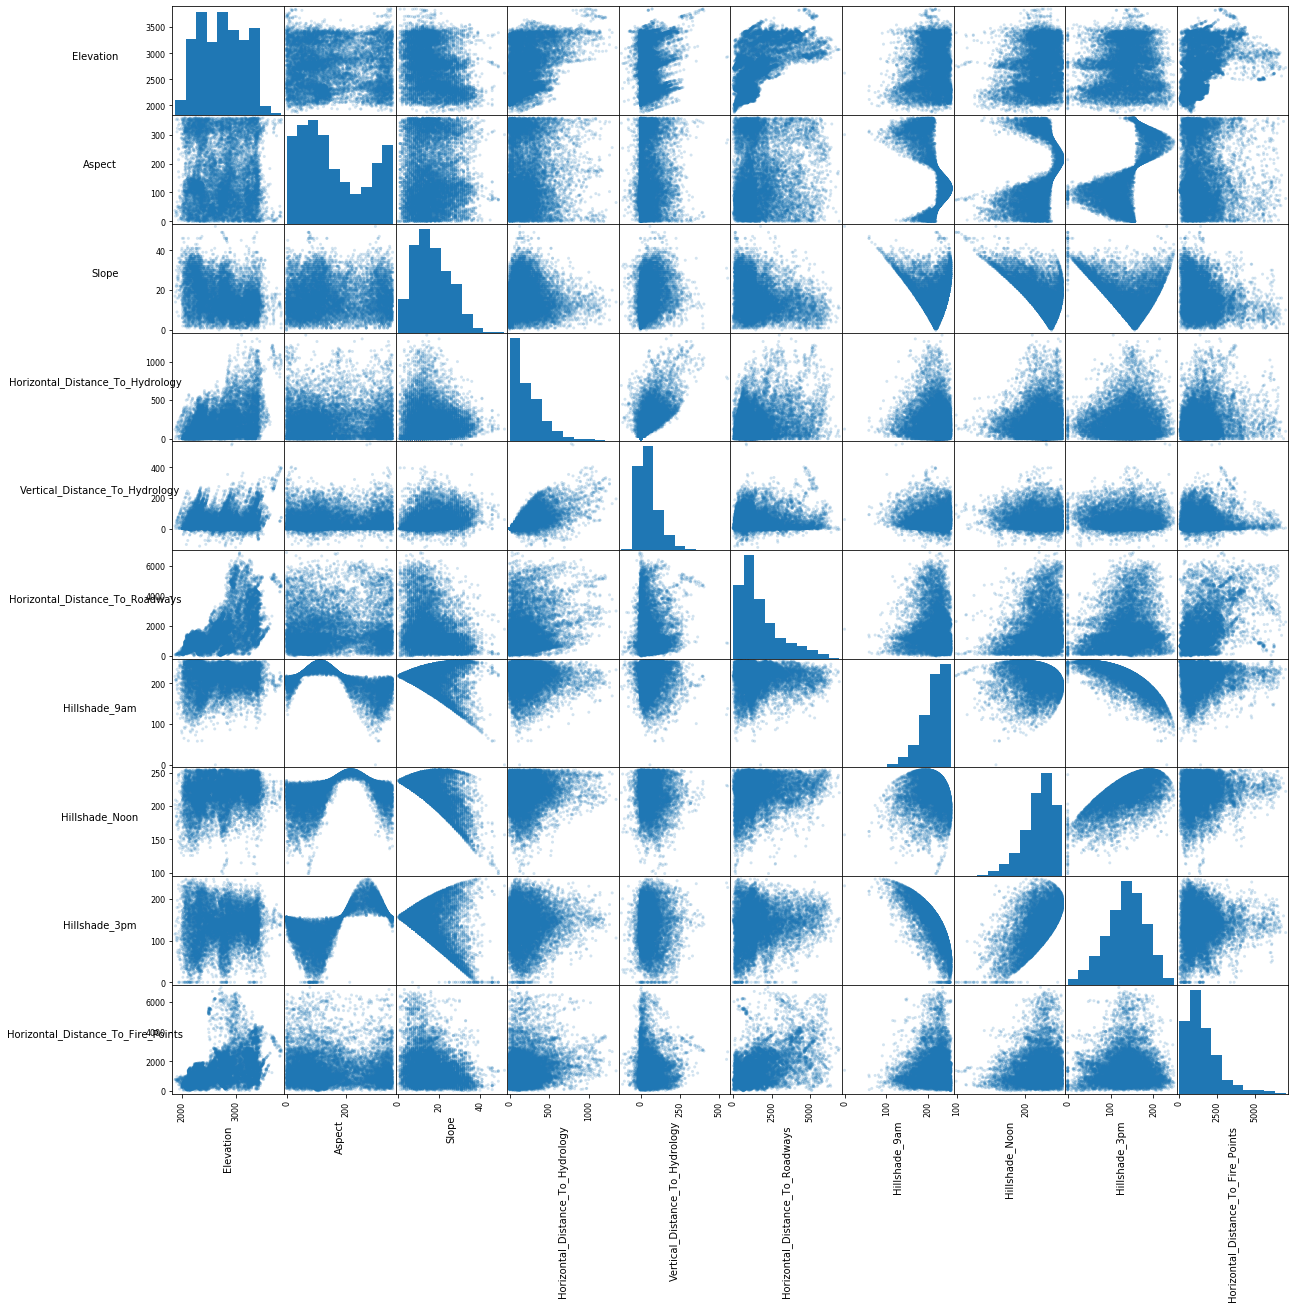

In [6]:
plot_temp = train_df[['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]
axs = pd.plotting.scatter_matrix(plot_temp,alpha=0.2,figsize=(20, 20))
n = len(plot_temp.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.show()

Followin are the observations :
1. The graph shows that there is a correlation between Hillshade_3PM , Hillshade_9AM , Hillshade_Noon , although it is not linear
2. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Aspect , although it is not linear.
3. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Slope , although it is not linear.
4. Log of Horizontal_Distance_To_Hydrology , Horizontal_Distance_To_Fire_Points , Horizontal_Distance_To_Roadways

#### Step 3 : Count zero and NA values

In [7]:
def count_non_zero_for_a_column(train_df, column_name):
    count_obj = train_df.apply(lambda x: True if x[column_name] == 0 else False , axis=1)
    no_rows = len(count_obj[count_obj == True].index)
    print ( column_name , ' : ' , no_rows )
print ("\033[1m" , 'Count of zero rows by column :' , "\033[0;0m")
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for column_name in column_list:
    count_non_zero_for_a_column(train_df, column_name)
print ("\033[1m" , 'Count of NA rows by column :' , "\033[0;0m")    
print (train_df.count(axis = 0)   ) 

 Count of zero rows by column : 
Elevation  :  0
Aspect  :  88
Slope  :  3
Horizontal_Distance_To_Hydrology  :  1249
Vertical_Distance_To_Hydrology  :  1484
Horizontal_Distance_To_Roadways  :  3
Hillshade_9am  :  1
Hillshade_Noon  :  0
Hillshade_3pm  :  70
Horizontal_Distance_To_Fire_Points  :  1
 Count of NA rows by column : 
Id                                    12000
Elevation                             12000
Aspect                                12000
Slope                                 12000
Horizontal_Distance_To_Hydrology      12000
Vertical_Distance_To_Hydrology        12000
Horizontal_Distance_To_Roadways       12000
Hillshade_9am                         12000
Hillshade_Noon                        12000
Hillshade_3pm                         12000
Horizontal_Distance_To_Fire_Points    12000
Wilderness_Area1                      12000
Wilderness_Area2                      12000
Wilderness_Area3                      12000
Wilderness_Area4                      12000
Soil_Type1 

Following are what we observe :
1. There are no NA values in any column
2. Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are zero for more than 10% of the data points.
    

### Solution Approaches

#### Approach 1 
1. Without transformation fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
2. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 2 
1. Tranform the train data continous features with Min Max Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 3 
1. Tranform the train data continous features with Robust Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 4 
1. Tranform the train data using PCA
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 5 
1. Tranform the train data continous features taking log for relevant fields
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

### Reusable Algorithm Code

In [8]:
warnings.filterwarnings(action='ignore')  

#### Logistic Regression

In [9]:
def classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ):
    print ( "\033[1m" ,  "Logistic Regression " , "\033[0;0m" )
    C_values= { 'C' : [ 0.01, 0.05 , 0.1,  1.0,10.0]}
    grd_model = GridSearchCV( LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio =0),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Decission Tree

In [10]:
def classify_decision_tree (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Decision Tree " , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'random_state' : [ 0 ,1 , 2]}
    grd_model = GridSearchCV( DecisionTreeClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Random Forest

In [11]:
def classify_random_forest (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Random Forest " , "\033[0;0m" )
    C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
    grd_model = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model 

#### KNN

In [12]:
def classify_KNN (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "K Nearest Neighbour" , "\033[0;0m" )
    C_values = { 'n_neighbors' : [1, 3, 5, 7, 9] }
    grd_model = GridSearchCV( KNeighborsClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Gradient Boosting

In [13]:
def classify_gradient_boosting(train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Gradient Boosting" , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'n_estimators' : [ 10, 20 , 30 , 40 ,50 ,60]}
    grd_model = GridSearchCV( GradientBoostingClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Scale continous variables

In [14]:
def fit_all_data_scalers(column_list , scaler_type ,  train_data , test_data , dev_data ):
    for column_name in column_list:
        if scaler_type == 'MinMax' :
            scaler = MinMaxScaler(feature_range=(0, 1))
        if scaler_type == 'Robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        column_index = train_df.columns.get_loc(column_name) - 1
        train_data[:,column_index] = scaler.fit_transform(train_data[:,column_index].reshape(-1,1)).reshape(-1)
        test_data[:,column_index] =  (scaler.transform(test_data[:,column_index].reshape(-1,1)).reshape(-1))
        dev_data[:,column_index] =  (scaler.transform(dev_data[:,column_index].reshape(-1,1)).reshape(-1))
    return train_data , test_data , dev_data 

#### Xgboost

In [15]:
def classify_xgboost_tree (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Xgboost Tree " , "\033[0;0m" )
    #brute force scan for all parameters, here are the tricks
    #usually max_depth is 6,7,8
    #learning rate is around 0.05, but small changes may make big diff
    #tuning min_child_weight subsample colsample_bytree can have 
    #much fun of fighting against overfit 
    #n_estimators is how many round of boosting
    #finally, ensemble xgboost with multiple seeds may reduce variance
    parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
                  'objective':['binary:logistic'],
                  'learning_rate': [0.05], #so called `eta` value
                  'max_depth': [3,5,7],
                  'min_child_weight': [11],#[1, 5, 10],
                  'silent': [1],
                  'subsample': [0.8],
                  'colsample_bytree': [1.0],#[0.6, 0.8, 1.0],
                  'n_estimators': [50, 100, 200], #number of trees, change it to 1000 for better results
                  'missing':[-999],
                  'seed': [1337]}
    grd_model = GridSearchCV(xgb.XGBClassifier(), parameters, return_train_score=1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), 
                    max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=1, 
                    tol=1e-4, random_state=1,
                    learning_rate_init=.05)

train_labels = train_labels.reshape(train_labels.shape[0],)
print(train_data.shape, train_labels.shape)

mlp.fit(train_data, train_labels)
print("Training set score: %f" % mlp.score(train_data, train_labels))
print("Test set score: %f" % mlp.score(dev_data, dev_labels))

(12000, 54) (12000,)
Iteration 1, loss = inf
Iteration 2, loss = 2.23437109
Iteration 3, loss = 2.23430554
Iteration 4, loss = 2.23450098
Iteration 5, loss = 2.23440001
Iteration 6, loss = 2.23464089
Iteration 7, loss = 2.23420066
Iteration 8, loss = 2.23441164
Iteration 9, loss = 2.23428786
Iteration 10, loss = 2.23433381
Iteration 11, loss = 2.23430760
Iteration 12, loss = 2.23420591
Iteration 13, loss = 2.23426693
Iteration 14, loss = 2.23432662
Iteration 15, loss = 2.23439810
Iteration 16, loss = 2.23421039
Iteration 17, loss = 2.23451088
Iteration 18, loss = 2.23439874
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.144667
Test set score: 0.133000


#### Neural Network

[INFO] training network...
7
Train on 12000 samples, validate on 1000 samples
Epoch 1/50
12000/12000 [==============================] - 0s 32us/step - loss: 3951.6738 - accuracy: 0.1422 - val_loss: 1.9458 - val_accuracy: 0.1360
Epoch 2/50
12000/12000 [==============================] - 0s 13us/step - loss: 1.9459 - accuracy: 0.1448 - val_loss: 1.9459 - val_accuracy: 0.1360
Epoch 3/50
12000/12000 [==============================] - 0s 12us/step - loss: 1.9459 - accuracy: 0.1448 - val_loss: 1.9460 - val_accuracy: 0.1360
Epoch 4/50
12000/12000 [==============================] - 0s 22us/step - loss: 1.9459 - accuracy: 0.1448 - val_loss: 1.9460 - val_accuracy: 0.1360
Epoch 5/50
12000/12000 [==============================] - 0s 14us/step - loss: 1.9459 - accuracy: 0.1448 - val_loss: 1.9461 - val_accuracy: 0.1360
Epoch 6/50
12000/12000 [==============================] - 0s 10us/step - loss: 1.9459 - accuracy: 0.1448 - val_loss: 1.9461 - val_accuracy: 0.1360
Epoch 7/50
12000/12000 [=============

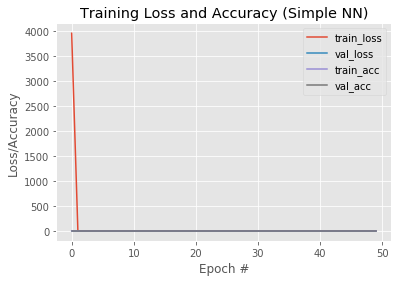

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

# define baseline model
def baseline_model(n_inputs, n_outputs, hidden_layers=[[1,8]]):
    # create model
    model = Sequential()
    model.add(Dense(hidden_layers[0][1], input_dim=n_inputs, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return(model)

def classify_neural_nets(train_data , train_labels , dev_data , dev_labels ):
    INIT_LR = 0.01
    EPOCHS = 50
    BATCH_SIZE = 128
    print("[INFO] training network...")
    opt = SGD(lr=INIT_LR)

    # encode class values as integers
    encoder = LabelEncoder()
    trainY = encoder.fit_transform(train_labels)
    devY = encoder.transform(dev_labels)
    
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_train_y = np_utils.to_categorical(trainY)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_dev_y = np_utils.to_categorical(devY)
    
    estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True)
    results = cross_val_score(estimator, X, dummy_y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    model = Sequential()
    model.add(Dense(100, input_dim=train_data.shape[1], activation='relu'))
    #model.add(Dense(100, activation='relu'))
    #model.add(Dense(20, activation='relu'))
    print(len(lb.classes_))
    model.add(Dense(len(lb.classes_), activation='softmax'))
    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # train the neural network
    H = model.fit(train_data, trainY, validation_data=(dev_data, devY),
                  epochs=EPOCHS, batch_size=BATCH_SIZE)
    print("[INFO] evaluating network...")
    predictions = model.predict(dev_data, batch_size=BATCH_SIZE)
    print(classification_report(devY.argmax(axis=1),predictions.argmax(axis=1)))
    print ('Confusion Matrix :')
    print (confusion_matrix(predictions.argmax(axis=1),devY.argmax(axis=1) ))  
    # plot the training loss and accuracy
    N = np.arange(0, EPOCHS)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, H.history["loss"], label="train_loss")
    plt.plot(N, H.history["val_loss"], label="val_loss")
    plt.plot(N, H.history["accuracy"], label="train_acc")
    plt.plot(N, H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy (Simple NN)")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
classify_neural_nets(train_data , train_labels , dev_data , dev_labels )

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

# define baseline model
def baseline_model(n_inputs=train_data.shape[1], n_outputs = 7):
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, activation='relu'))
    model.add(Dense(10, activation='relu'))
    #model.add(Dense(2*hidden_layers[0][1], activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return(model)

def classify_neural_nets(train_data , train_labels , dev_data , dev_labels ):
    INIT_LR = 0.01
    EPOCHS = 2
    BATCH_SIZE = 128
    print("[INFO] training network...")
    opt = SGD(lr=INIT_LR)

    # encode class values as integers
    encoder = LabelEncoder()
    trainY = encoder.fit_transform(train_labels)
    devY = encoder.transform(dev_labels)
    
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_train_y = np_utils.to_categorical(trainY)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_dev_y = np_utils.to_categorical(devY)
    
    estimator = KerasClassifier(build_fn=baseline_model, 
                                #n_inputs=train_data.shape[1], n_outputs=7, hidden_layers=[[1,8]], 
                                epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
    kfold = KFold(n_splits=2, shuffle=True)
    results = cross_val_score(estimator, train_data, train_labels, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print("[INFO] evaluating network...")
    print(estimator)
    #predictions = estimator.predict(dev_data, batch_size=BATCH_SIZE)
    #print(classification_report(dev_labels.argmax(axis=1),predictions.argmax(axis=1)))
    #print ('Confusion Matrix :')
    #print (confusion_matrix(predictions.argmax(axis=1),dev_labels.argmax(axis=1) ))  
    # plot the training loss and accuracy
    #N = np.arange(0, EPOCHS)
    #plt.style.use("ggplot")
    #plt.figure()
    #plt.plot(N, H.history["loss"], label="train_loss")
    #plt.plot(N, H.history["val_loss"], label="val_loss")
    #plt.plot(N, H.history["accuracy"], label="train_acc")
    #plt.plot(N, H.history["val_accuracy"], label="val_acc")
    #plt.title("Training Loss and Accuracy (Simple NN)")
    #plt.xlabel("Epoch #")
    #plt.ylabel("Loss/Accuracy")
    #plt.legend()
    return(estimator)

nn_model = baseline_model(n_inputs=train_data.shape[1], n_outputs = 7, hidden_layers = (20,3))
estimator = KerasClassifier(nn_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
model = classify_neural_nets(train_data , train_labels , dev_data , dev_labels )

[INFO] training network...
Epoch 1/2
6000/6000 [==============================] - 1s 104us/step - loss: 346.9405 - accuracy: 0.1092
Epoch 2/2
6000/6000 [==============================] - 1s 88us/step
Epoch 1/2
6000/6000 [==============================] - 1s 106us/step - loss: 272.4869 - accuracy: 0.1307
Epoch 2/2
6000/6000 [==============================] - 1s 89us/step
Baseline: 18.49% (2.24%)
[INFO] evaluating network...


In [60]:
n_inputs = train_data.shape[0]
n_outputs = 7
encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_Y = encoder.transform(train_labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_train_y = np_utils.to_categorical(encoded_Y)
dev_Y = encoder.transform(dev_labels)
dummy_dev_y = np_utils.to_categorical(dev_Y)

In [61]:
dummy_train_y.shape

(12000, 7)

In [62]:
dummy_dev_y.shape

(1000, 7)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.5))
    model.add(Dense(20, input_shape=(54,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    return model

encoder = LabelEncoder()
trainY = encoder.fit_transform(train_labels)
devY = encoder.transform(dev_labels)
    
# convert integers to dummy variables (i.e. one hot encoded)
dummy_train_y = np_utils.to_categorical(trainY)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_dev_y = np_utils.to_categorical(devY)
model = baseline_model()
print(train_data.shape)
scalar = MinMaxScaler()
scalar.fit(train_data)
train_data_X = scalar.transform(train_data)
dev_data_X = scalar.transform(dev_data)
model.fit(train_data_X, dummy_train_y, epochs=2000, verbose=1, batch_size=128)
predictions = model.predict(dev_data_X)
print(classification_report(dummy_dev_y.argmax(axis=1),predictions.argmax(axis=1)))
print ('Confusion Matrix :')
print (confusion_matrix(predictions.argmax(axis=1),dummy_dev_y.argmax(axis=1) ))
#estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1, warm_start=False)
#kfold = KFold(n_splits=5, shuffle=True)
#results = cross_val_score(estimator, train_data, dummy_train_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

(12000, 54)
Epoch 1/2000
12000/12000 [==============================] - 0s 36us/step - loss: 1.9426 - accuracy: 0.1546
Epoch 2/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.9399 - accuracy: 0.1663
Epoch 3/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.9360 - accuracy: 0.1838
Epoch 4/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.9340 - accuracy: 0.1902
Epoch 5/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.9299 - accuracy: 0.2037
Epoch 6/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.9268 - accuracy: 0.2065
Epoch 7/2000
12000/12000 [==============================] - 0s 16us/step - loss: 1.9209 - accuracy: 0.2142
Epoch 8/2000
12000/12000 [==============================] - 0s 17us/step - loss: 1.9155 - accuracy: 0.2282
Epoch 9/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.9093 - accuracy: 0.2337
Epoch 10/2000
12000/12000

12000/12000 [==============================] - 0s 17us/step - loss: 1.2932 - accuracy: 0.4483
Epoch 77/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.2958 - accuracy: 0.4515
Epoch 78/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.2950 - accuracy: 0.4452
Epoch 79/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.2849 - accuracy: 0.4541
Epoch 80/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.2855 - accuracy: 0.4491
Epoch 81/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.2961 - accuracy: 0.4473
Epoch 82/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.2848 - accuracy: 0.4593
Epoch 83/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.2750 - accuracy: 0.4642
Epoch 84/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.2807 - accuracy: 0.4552
Epoch 85/2000
12000/12000 [===============

12000/12000 [==============================] - 0s 21us/step - loss: 1.1443 - accuracy: 0.5048
Epoch 152/2000
12000/12000 [==============================] - 0s 19us/step - loss: 1.1498 - accuracy: 0.5057
Epoch 153/2000
12000/12000 [==============================] - 0s 19us/step - loss: 1.1409 - accuracy: 0.5082
Epoch 154/2000
12000/12000 [==============================] - 0s 20us/step - loss: 1.1364 - accuracy: 0.5131
Epoch 155/2000
12000/12000 [==============================] - 0s 19us/step - loss: 1.1434 - accuracy: 0.5035
Epoch 156/2000
12000/12000 [==============================] - 0s 37us/step - loss: 1.1299 - accuracy: 0.5089
Epoch 157/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.1364 - accuracy: 0.5138
Epoch 158/2000
12000/12000 [==============================] - 0s 16us/step - loss: 1.1288 - accuracy: 0.5114
Epoch 159/2000
12000/12000 [==============================] - 0s 17us/step - loss: 1.1271 - accuracy: 0.5113
Epoch 160/2000
12000/12000 [======

12000/12000 [==============================] - 0s 18us/step - loss: 1.0895 - accuracy: 0.5258
Epoch 227/2000
12000/12000 [==============================] - 0s 17us/step - loss: 1.1022 - accuracy: 0.5148
Epoch 228/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.0937 - accuracy: 0.5134
Epoch 229/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0852 - accuracy: 0.5231
Epoch 230/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0974 - accuracy: 0.5226
Epoch 231/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0940 - accuracy: 0.5228
Epoch 232/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0826 - accuracy: 0.5311
Epoch 233/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0971 - accuracy: 0.5219
Epoch 234/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0871 - accuracy: 0.5231
Epoch 235/2000
12000/12000 [======

12000/12000 [==============================] - 0s 14us/step - loss: 1.0631 - accuracy: 0.5387
Epoch 302/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0712 - accuracy: 0.5312
Epoch 303/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0604 - accuracy: 0.5376
Epoch 304/2000
12000/12000 [==============================] - 0s 16us/step - loss: 1.0727 - accuracy: 0.5325
Epoch 305/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0657 - accuracy: 0.5293
Epoch 306/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0718 - accuracy: 0.5313
Epoch 307/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.0835 - accuracy: 0.5265
Epoch 308/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0637 - accuracy: 0.5347
Epoch 309/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0696 - accuracy: 0.5326
Epoch 310/2000
12000/12000 [======

12000/12000 [==============================] - 0s 15us/step - loss: 1.0545 - accuracy: 0.5384
Epoch 377/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0585 - accuracy: 0.5427
Epoch 378/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.0611 - accuracy: 0.5346
Epoch 379/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.0654 - accuracy: 0.5350
Epoch 380/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0556 - accuracy: 0.5438
Epoch 381/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0673 - accuracy: 0.5384
Epoch 382/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0566 - accuracy: 0.5393
Epoch 383/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0520 - accuracy: 0.5346
Epoch 384/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0570 - accuracy: 0.5418
Epoch 385/2000
12000/12000 [======

12000/12000 [==============================] - 0s 16us/step - loss: 1.0503 - accuracy: 0.5393
Epoch 452/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.0390 - accuracy: 0.5482
Epoch 453/2000
12000/12000 [==============================] - 0s 16us/step - loss: 1.0472 - accuracy: 0.5430
Epoch 454/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0468 - accuracy: 0.5431
Epoch 455/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0488 - accuracy: 0.5429
Epoch 456/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0487 - accuracy: 0.5447
Epoch 457/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0457 - accuracy: 0.5466
Epoch 458/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0515 - accuracy: 0.5378
Epoch 459/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0427 - accuracy: 0.5414
Epoch 460/2000
12000/12000 [======

12000/12000 [==============================] - 0s 18us/step - loss: 1.0318 - accuracy: 0.5512
Epoch 527/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0385 - accuracy: 0.5502
Epoch 528/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0430 - accuracy: 0.5439
Epoch 529/2000
12000/12000 [==============================] - 0s 15us/step - loss: 1.0347 - accuracy: 0.5545
Epoch 530/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0465 - accuracy: 0.5487
Epoch 531/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0297 - accuracy: 0.5521
Epoch 532/2000
12000/12000 [==============================] - 0s 16us/step - loss: 1.0314 - accuracy: 0.5561
Epoch 533/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0274 - accuracy: 0.5577
Epoch 534/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0322 - accuracy: 0.5523
Epoch 535/2000
12000/12000 [======

Epoch 601/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0383 - accuracy: 0.5535
Epoch 602/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0406 - accuracy: 0.5492
Epoch 603/2000
12000/12000 [==============================] - ETA: 0s - loss: 1.0321 - accuracy: 0.55 - 0s 17us/step - loss: 1.0326 - accuracy: 0.5529
Epoch 604/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0317 - accuracy: 0.5558
Epoch 605/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0458 - accuracy: 0.5511
Epoch 606/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0381 - accuracy: 0.5486
Epoch 607/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0351 - accuracy: 0.5526
Epoch 608/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0385 - accuracy: 0.5575
Epoch 609/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0

12000/12000 [==============================] - 0s 12us/step - loss: 1.0288 - accuracy: 0.5587
Epoch 676/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0295 - accuracy: 0.5584
Epoch 677/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0359 - accuracy: 0.5557
Epoch 678/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0242 - accuracy: 0.5577
Epoch 679/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0273 - accuracy: 0.5575
Epoch 680/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0241 - accuracy: 0.5597
Epoch 681/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0379 - accuracy: 0.5469
Epoch 682/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0239 - accuracy: 0.5621
Epoch 683/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0272 - accuracy: 0.5602
Epoch 684/2000
12000/12000 [======

12000/12000 [==============================] - 0s 13us/step - loss: 1.0242 - accuracy: 0.5545
Epoch 751/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0261 - accuracy: 0.5592
Epoch 752/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0307 - accuracy: 0.5596
Epoch 753/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0278 - accuracy: 0.5615
Epoch 754/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0307 - accuracy: 0.5578
Epoch 755/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0318 - accuracy: 0.5611
Epoch 756/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0205 - accuracy: 0.5608
Epoch 757/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0225 - accuracy: 0.5648
Epoch 758/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0248 - accuracy: 0.5559
Epoch 759/2000
12000/12000 [======

12000/12000 [==============================] - 0s 13us/step - loss: 1.0218 - accuracy: 0.5622
Epoch 826/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0254 - accuracy: 0.5660
Epoch 827/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0242 - accuracy: 0.5638
Epoch 828/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0125 - accuracy: 0.5627
Epoch 829/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0233 - accuracy: 0.5614
Epoch 830/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0203 - accuracy: 0.5637
Epoch 831/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0191 - accuracy: 0.5658
Epoch 832/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0200 - accuracy: 0.5637
Epoch 833/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0159 - accuracy: 0.5618
Epoch 834/2000
12000/12000 [======

12000/12000 [==============================] - 0s 14us/step - loss: 1.0191 - accuracy: 0.5585
Epoch 901/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0163 - accuracy: 0.5689
Epoch 902/2000
12000/12000 [==============================] - 0s 22us/step - loss: 1.0144 - accuracy: 0.5670
Epoch 903/2000
12000/12000 [==============================] - 0s 17us/step - loss: 1.0166 - accuracy: 0.5636
Epoch 904/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0217 - accuracy: 0.5630
Epoch 905/2000
12000/12000 [==============================] - 0s 16us/step - loss: 1.0167 - accuracy: 0.5591
Epoch 906/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0148 - accuracy: 0.5652
Epoch 907/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0150 - accuracy: 0.5640
Epoch 908/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0182 - accuracy: 0.5567
Epoch 909/2000
12000/12000 [======

12000/12000 [==============================] - 0s 15us/step - loss: 1.0117 - accuracy: 0.5633
Epoch 975/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0058 - accuracy: 0.5654
Epoch 976/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0171 - accuracy: 0.5662
Epoch 977/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0163 - accuracy: 0.5642
Epoch 978/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0016 - accuracy: 0.5731
Epoch 979/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0113 - accuracy: 0.5644
Epoch 980/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0154 - accuracy: 0.5609
Epoch 981/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0190 - accuracy: 0.5662
Epoch 982/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0176 - accuracy: 0.5600
Epoch 983/2000
12000/12000 [======

12000/12000 [==============================] - 0s 12us/step - loss: 1.0151 - accuracy: 0.5664
Epoch 1049/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0115 - accuracy: 0.5689
Epoch 1050/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9995 - accuracy: 0.5684
Epoch 1051/2000
12000/12000 [==============================] - 0s 14us/step - loss: 1.0053 - accuracy: 0.5670
Epoch 1052/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0008 - accuracy: 0.5703
Epoch 1053/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0058 - accuracy: 0.5689
Epoch 1054/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0026 - accuracy: 0.5715
Epoch 1055/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0119 - accuracy: 0.5626
Epoch 1056/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0093 - accuracy: 0.5632
Epoch 1057/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 1.0054 - accuracy: 0.5676
Epoch 1123/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0055 - accuracy: 0.5686
Epoch 1124/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0055 - accuracy: 0.5724
Epoch 1125/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0062 - accuracy: 0.5687
Epoch 1126/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0170 - accuracy: 0.5620
Epoch 1127/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0079 - accuracy: 0.5642
Epoch 1128/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0009 - accuracy: 0.5694
Epoch 1129/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0049 - accuracy: 0.5726
Epoch 1130/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0173 - accuracy: 0.5625
Epoch 1131/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 1.0006 - accuracy: 0.5749
Epoch 1197/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0009 - accuracy: 0.5632
Epoch 1198/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9922 - accuracy: 0.5764
Epoch 1199/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9942 - accuracy: 0.5740
Epoch 1200/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0058 - accuracy: 0.5731
Epoch 1201/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0125 - accuracy: 0.5698
Epoch 1202/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0025 - accuracy: 0.5723
Epoch 1203/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0017 - accuracy: 0.5677
Epoch 1204/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0031 - accuracy: 0.5702
Epoch 1205/2000
12000/1200

12000/12000 [==============================] - 0s 18us/step - loss: 1.0003 - accuracy: 0.5673
Epoch 1271/2000
12000/12000 [==============================] - 0s 21us/step - loss: 0.9983 - accuracy: 0.5715
Epoch 1272/2000
12000/12000 [==============================] - 0s 19us/step - loss: 1.0056 - accuracy: 0.5722
Epoch 1273/2000
12000/12000 [==============================] - 0s 24us/step - loss: 1.0066 - accuracy: 0.5645
Epoch 1274/2000
12000/12000 [==============================] - 0s 21us/step - loss: 1.0069 - accuracy: 0.5641
Epoch 1275/2000
12000/12000 [==============================] - 0s 20us/step - loss: 0.9856 - accuracy: 0.5741
Epoch 1276/2000
12000/12000 [==============================] - 0s 21us/step - loss: 1.0029 - accuracy: 0.5682
Epoch 1277/2000
12000/12000 [==============================] - 0s 25us/step - loss: 0.9955 - accuracy: 0.5753
Epoch 1278/2000
12000/12000 [==============================] - 0s 21us/step - loss: 0.9969 - accuracy: 0.5696
Epoch 1279/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 1.0074 - accuracy: 0.5661
Epoch 1345/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0035 - accuracy: 0.5726
Epoch 1346/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9961 - accuracy: 0.5748
Epoch 1347/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0037 - accuracy: 0.5702
Epoch 1348/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9900 - accuracy: 0.5752
Epoch 1349/2000
12000/12000 [==============================] - 0s 13us/step - loss: 1.0085 - accuracy: 0.5692
Epoch 1350/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9940 - accuracy: 0.5688
Epoch 1351/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9912 - accuracy: 0.5759
Epoch 1352/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0042 - accuracy: 0.5671
Epoch 1353/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 0.9990 - accuracy: 0.5734
Epoch 1419/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0016 - accuracy: 0.5708
Epoch 1420/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9902 - accuracy: 0.5788
Epoch 1421/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9900 - accuracy: 0.5718
Epoch 1422/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9917 - accuracy: 0.5764
Epoch 1423/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9979 - accuracy: 0.5718
Epoch 1424/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9970 - accuracy: 0.5752
Epoch 1425/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9965 - accuracy: 0.5701
Epoch 1426/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9935 - accuracy: 0.5754
Epoch 1427/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 0.9971 - accuracy: 0.5720
Epoch 1493/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9953 - accuracy: 0.5692
Epoch 1494/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0042 - accuracy: 0.5642
Epoch 1495/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9932 - accuracy: 0.5764
Epoch 1496/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9961 - accuracy: 0.5704
Epoch 1497/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0007 - accuracy: 0.5675
Epoch 1498/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9924 - accuracy: 0.5717
Epoch 1499/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0031 - accuracy: 0.5679
Epoch 1500/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0016 - accuracy: 0.5648
Epoch 1501/2000
12000/1200

12000/12000 [==============================] - 0s 14us/step - loss: 0.9947 - accuracy: 0.5698
Epoch 1567/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9992 - accuracy: 0.5660
Epoch 1568/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9954 - accuracy: 0.5714
Epoch 1569/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9964 - accuracy: 0.5680
Epoch 1570/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9990 - accuracy: 0.5664
Epoch 1571/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9956 - accuracy: 0.5733
Epoch 1572/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0055 - accuracy: 0.5621
Epoch 1573/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9878 - accuracy: 0.5708
Epoch 1574/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9920 - accuracy: 0.5718
Epoch 1575/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 0.9895 - accuracy: 0.5717
Epoch 1641/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9928 - accuracy: 0.5750
Epoch 1642/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9905 - accuracy: 0.5773
Epoch 1643/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9876 - accuracy: 0.5731
Epoch 1644/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9876 - accuracy: 0.5809
Epoch 1645/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9930 - accuracy: 0.5778
Epoch 1646/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9955 - accuracy: 0.5767
Epoch 1647/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9822 - accuracy: 0.5791
Epoch 1648/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9966 - accuracy: 0.5702
Epoch 1649/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 0.9941 - accuracy: 0.5725
Epoch 1715/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9913 - accuracy: 0.5760
Epoch 1716/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9919 - accuracy: 0.5760
Epoch 1717/2000
12000/12000 [==============================] - 0s 13us/step - loss: 0.9901 - accuracy: 0.5751
Epoch 1718/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9968 - accuracy: 0.5701
Epoch 1719/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9875 - accuracy: 0.5744
Epoch 1720/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9810 - accuracy: 0.5775
Epoch 1721/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9849 - accuracy: 0.5719
Epoch 1722/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9842 - accuracy: 0.5781
Epoch 1723/2000
12000/1200

12000/12000 [==============================] - 0s 12us/step - loss: 0.9800 - accuracy: 0.5829
Epoch 1789/2000
12000/12000 [==============================] - 0s 16us/step - loss: 1.0005 - accuracy: 0.5686
Epoch 1790/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9838 - accuracy: 0.5822
Epoch 1791/2000
12000/12000 [==============================] - 0s 12us/step - loss: 1.0017 - accuracy: 0.5733
Epoch 1792/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9823 - accuracy: 0.5767
Epoch 1793/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9894 - accuracy: 0.5767
Epoch 1794/2000
12000/12000 [==============================] - 0s 12us/step - loss: 0.9997 - accuracy: 0.5710
Epoch 1795/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9956 - accuracy: 0.5713
Epoch 1796/2000
12000/12000 [==============================] - 0s 16us/step - loss: 0.9879 - accuracy: 0.5775
Epoch 1797/2000
12000/1200

12000/12000 [==============================] - 0s 15us/step - loss: 0.9871 - accuracy: 0.5760
Epoch 1863/2000
12000/12000 [==============================] - 0s 16us/step - loss: 0.9899 - accuracy: 0.5767
Epoch 1864/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9796 - accuracy: 0.5765
Epoch 1865/2000
12000/12000 [==============================] - 0s 16us/step - loss: 0.9918 - accuracy: 0.5762
Epoch 1866/2000
12000/12000 [==============================] - 0s 15us/step - loss: 0.9900 - accuracy: 0.5763
Epoch 1867/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9948 - accuracy: 0.5717
Epoch 1868/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9871 - accuracy: 0.5729
Epoch 1869/2000
12000/12000 [==============================] - 0s 15us/step - loss: 0.9899 - accuracy: 0.5782
Epoch 1870/2000
12000/12000 [==============================] - 0s 15us/step - loss: 0.9921 - accuracy: 0.5740
Epoch 1871/2000
12000/1200

12000/12000 [==============================] - 0s 15us/step - loss: 0.9915 - accuracy: 0.5773
Epoch 1937/2000
12000/12000 [==============================] - 0s 15us/step - loss: 0.9927 - accuracy: 0.5760
Epoch 1938/2000
12000/12000 [==============================] - 0s 16us/step - loss: 0.9864 - accuracy: 0.5751
Epoch 1939/2000
12000/12000 [==============================] - 0s 16us/step - loss: 0.9757 - accuracy: 0.5799
Epoch 1940/2000
12000/12000 [==============================] - 0s 16us/step - loss: 0.9920 - accuracy: 0.5701
Epoch 1941/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9857 - accuracy: 0.5749
Epoch 1942/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9883 - accuracy: 0.5773
Epoch 1943/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9891 - accuracy: 0.5746
Epoch 1944/2000
12000/12000 [==============================] - 0s 14us/step - loss: 0.9903 - accuracy: 0.5696
Epoch 1945/2000
12000/1200

/Users/krsrik/.venvs/opencv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# example of training a final classification model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=12000, centers=7, n_features=54, random_state=1)
encoder = LabelEncoder()
trainY = encoder.fit_transform(y)
dummy_train_y = np_utils.to_categorical(trainY)
#print(trainY)
#print(dummy_train_y)
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=54, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
model.fit(X, dummy_train_y, epochs=20, verbose=1)
model.predict(X)

Epoch 1/20
12000/12000 [==============================] - 1s 49us/step - loss: 1.6045 - accuracy: 0.3268
Epoch 2/20
12000/12000 [==============================] - 0s 32us/step - loss: 1.1401 - accuracy: 0.4606
Epoch 3/20
12000/12000 [==============================] - 0s 35us/step - loss: 0.8363 - accuracy: 0.7035
Epoch 4/20
12000/12000 [==============================] - 0s 32us/step - loss: 0.5778 - accuracy: 0.8737
Epoch 5/20
12000/12000 [==============================] - 0s 33us/step - loss: 0.3438 - accuracy: 0.9460
Epoch 6/20
12000/12000 [==============================] - 0s 34us/step - loss: 0.1806 - accuracy: 0.9998
Epoch 7/20
12000/12000 [==============================] - 0s 34us/step - loss: 0.0919 - accuracy: 1.0000
Epoch 8/20
12000/12000 [==============================] - 0s 34us/step - loss: 0.0554 - accuracy: 1.0000
Epoch 9/20
12000/12000 [==============================] - 0s 36us/step - loss: 0.0377 - accuracy: 1.0000
Epoch 10/20
12000/12000 [==============================

array([[2.76858425e-10, 7.42279042e-07, 9.98745799e-01, ...,
        7.49260013e-04, 4.90358275e-07, 3.89503839e-04],
       [4.39687661e-11, 1.68996507e-06, 9.97771144e-01, ...,
        1.73672091e-03, 1.21820460e-06, 4.36177914e-04],
       [2.08614011e-11, 1.78909977e-06, 9.97025192e-01, ...,
        2.62600346e-03, 3.07897699e-06, 3.14416597e-04],
       ...,
       [5.09475532e-04, 2.95083002e-09, 1.60646687e-05, ...,
        1.32663618e-12, 1.94688410e-22, 1.00074764e-02],
       [2.05370365e-09, 1.26481780e-06, 9.98085976e-01, ...,
        4.97435511e-04, 1.70596749e-07, 9.82836937e-04],
       [1.28944584e-26, 3.00154253e-03, 3.91026610e-04, ...,
        9.94987726e-01, 1.61466165e-03, 5.07413415e-06]], dtype=float32)

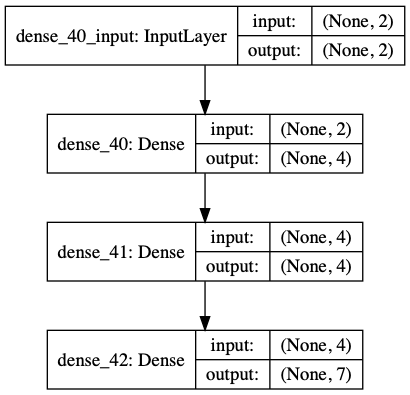

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True,to_file='model.png')

#### Run all algorithms

In [43]:
def run_all_algorithms (train_data , train_labels , dev_data , dev_labels ):
    # Run KNN
    grd_model_knn = classify_KNN(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_knn.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Logistic Regression
    grd_model_lr = classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_lr.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))   
    # Run Decission Tree
    grd_model_dt = classify_decision_tree(train_data , train_labels , dev_data , dev_labels )  
    predicted = grd_model_dt.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Random Forest
    grd_model_rf = classify_random_forest(train_data , train_labels , dev_data , dev_labels )
    predicted = grd_model_rf.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))  
    return grd_model_knn , grd_model_lr , grd_model_dt , grd_model_rf 
    # Run extreme gradient boosted tree
    grd_model_xgb = classify_xgboost_tree(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_xgb.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))  
    return grd_model_knn , grd_model_lr , grd_model_dt , grd_model_rf , grd_model_xgb

In [116]:
def run_one_algorithm(train_data , train_labels , dev_data , dev_labels ):
    grd_model = classify_xgboost_tree(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))

In [119]:
run_one_algorithm(train_data , train_labels , dev_data , dev_labels )

 Xgboost Tree  
Best fit parameters :
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 200, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
Best fit model F1 score :
0.821
Classification Report :
              precision    recall  f1-score   support

           1       0.76      0.70      0.73       150
           2       0.58      0.73      0.65       120
           3       0.80      0.80      0.80       141
           4       0.97      0.95      0.96       147
           5       0.88      0.83      0.86       148
           6       0.85      0.80      0.82       158
           7       0.93      0.93      0.93       136

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000

Confusion Matrix :
[[105  35   0   0   0   1   9]
 [ 24  88   0   0   6   2   0]
 [  0   3 

 ### Approach 1

In [45]:
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

Run all algorithms and check accuracy on dev data . Also check the confusion matrix and accuracy per class. Validate  accuracy on test data.

In [46]:
grd_model_knn_1 , grd_model_lr_1 , grd_model_dt_1 ,   grd_model_rf_1 , grd_model_xgb_1    = run_all_algorithms (train_data , train_labels , dev_data , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.823
Classification Report :
              precision    recall  f1-score   support

           1       0.67      0.71      0.69       129
           2       0.61      0.70      0.65       133
           3       0.80      0.83      0.82       137
           4       0.95      0.89      0.92       154
           5       0.94      0.85      0.89       154
           6       0.84      0.85      0.84       146
           7       0.96      0.90      0.93       147

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.83      1000

Confusion Matrix :
[[ 92  30   0   0   2   1   4]
 [ 31  93   2   0   4   2   1]
 [  0   6 114   4   1  12   0]
 [  0   0  11 137   0   6   0]
 [  3  16   1   0 131   3   0]
 [  0   4  14   3   1 124   0]
 [ 12   3   0   0   0   0 132]]
 Logistic Regression  
Best fit parameters :
{'

ValueError: not enough values to unpack (expected 5, got 4)

The accuracy is highest in KNN followed by Random Forest. F1 score is low for Class 1 and 2 . Also from the confusion matrix it is clear that the algorithms are most confused between class 1 and 2 
We run the algorithms with the top 10 important features from decision tree

In [18]:
top_10_estimators = np.argsort(grd_model_dt_1.best_estimator_.feature_importances_)[::-1][0:10]
grd_model_knn_new , grd_model_lr_new , grd_model_dt_new ,  grd_model_rf_new = run_all_algorithms (train_data[:,top_10_estimators] , train_labels , dev_data[:,top_10_estimators] , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.835
Classification Report :
              precision    recall  f1-score   support

           1       0.69      0.74      0.72       133
           2       0.64      0.75      0.69       118
           3       0.74      0.79      0.77       125
           4       0.96      0.92      0.94       183
           5       0.97      0.88      0.93       147
           6       0.86      0.83      0.84       150
           7       0.96      0.88      0.92       144

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.85      0.83      0.84      1000

Confusion Matrix :
[[ 99  30   0   0   0   0   4]
 [ 24  89   1   0   3   0   1]
 [  0   6  99   7   0  13   0]
 [  0   0  10 168   0   5   0]
 [  4   9   2   0 130   2   0]
 [  0   4  21   0   1 124   0]
 [ 16   2   0   0   0   0 126]]
 Logistic Regression  
Best fit parameters :
{'

The accuracy for KNN remains the same while for all models the accuracy reduces. We predict on the train data for the following models :

1. KNN with all features
2. Random Forest with all features
3. KNN with the 10 features

In [19]:
print ( "\033[1m" ,  "KNN with test predictions all features : " , "\033[0;0m" )
predicted= grd_model_knn_1.predict(test_data)
print(metrics.f1_score(test_labels, predicted , average='micro')) 

print ( "\033[1m" ,  "Random Forest with test predictions all features : " , "\033[0;0m" )
predicted= grd_model_rf_1.predict(test_data)
print(metrics.f1_score(test_labels, predicted , average='micro')) 

print ( "\033[1m" ,  "KNN with test predictions with 10 important features : " , "\033[0;0m" )
predicted= grd_model_knn_new.predict(test_data[:,top_10_estimators])
print(metrics.f1_score(test_labels, predicted , average='micro')) 

 KNN with test predictions all features :  
0.8462264150943396
 Random Forest with test predictions all features :  
0.8264150943396227
 KNN with test predictions with 10 important features :  
0.8462264150943396


We get the highest accuracy for KNN

 ### Approach 2

Using min max scalar for the continous features

In [20]:
scaler_type = 'MinMax'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
grd_model_knn_2 , grd_model_lr_2 , grd_model_dt_2 , grd_model_rf_2   = run_all_algorithms (train_data_trans , train_labels , dev_data_trans , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.823
Classification Report :
              precision    recall  f1-score   support

           1       0.78      0.79      0.78       141
           2       0.67      0.73      0.70       129
           3       0.70      0.78      0.74       119
           4       0.94      0.89      0.92       185
           5       0.93      0.86      0.89       144
           6       0.79      0.77      0.78       149
           7       0.93      0.92      0.92       133

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.82      0.83      1000

Confusion Matrix :
[[111  23   0   0   0   0   7]
 [ 22  94   3   0   7   1   2]
 [  0   4  93   3   2  17   0]
 [  0   1  12 165   0   7   0]
 [  4   9   2   0 124   5   0]
 [  0   4  23   7   1 114   0]
 [  6   5   0   0   0   0 122]]
 Logistic Regression  
Best fit parameters :
{'

The accuracy drops with scaling the data

 ### Approach 3

Using robust scalar for the continous features

In [21]:
scaler_type = 'Robust'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
grd_model_knn_3 , grd_model_lr_3 , grd_model_dt_3 ,  grd_model_rf_3    = run_all_algorithms (train_data_trans , train_labels , dev_data_trans , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.821
Classification Report :
              precision    recall  f1-score   support

           1       0.79      0.78      0.79       144
           2       0.64      0.74      0.69       121
           3       0.69      0.77      0.73       119
           4       0.94      0.90      0.92       182
           5       0.93      0.84      0.88       149
           6       0.80      0.76      0.78       151
           7       0.93      0.91      0.92       134

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000

Confusion Matrix :
[[113  24   0   0   0   0   7]
 [ 19  90   3   0   6   1   2]
 [  0   4  92   5   2  16   0]
 [  0   1  10 164   0   7   0]
 [  5  11   3   0 125   5   0]
 [  0   4  25   6   1 115   0]
 [  6   6   0   0   0   0 122]]
 Logistic Regression  
Best fit parameters :
{'

The accuracy drops with scaling the data

 ### Approach 4

Fit PCA on train data and fit model on the PCA

In [50]:
pca = PCA(n_components=50)
pca.fit(train_data)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,7.268385e-01,0.726838
1,2,2.205821e-01,0.947421
2,3,3.612634e-02,0.983547
3,4,1.106287e-02,0.994610
4,5,4.117313e-03,0.998727
5,6,6.457625e-04,0.999373
6,7,4.328501e-04,0.999806
7,8,1.811272e-04,0.999987
8,9,1.195107e-05,0.999999
9,10,8.308808e-07,1.000000


First 10 components explains 100% of the variance . Hence we fit the PCA for 10 components

In [51]:
pca = PCA(n_components=10)
pca.fit(train_data)
train_pca = pca.transform(train_data)
dev_pca = pca.transform(dev_data)
test_pca = pca.transform(test_data)
grd_model_knn_4 , grd_model_lr_4 , grd_model_dt_4 , grd_model_rf_4, grd_model_xgb_4   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.823
Classification Report :
              precision    recall  f1-score   support

           1       0.67      0.71      0.69       129
           2       0.61      0.70      0.65       133
           3       0.80      0.83      0.82       137
           4       0.95      0.89      0.92       154
           5       0.94      0.85      0.89       154
           6       0.84      0.85      0.84       146
           7       0.96      0.90      0.93       147

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.83      1000

Confusion Matrix :
[[ 92  30   0   0   2   1   4]
 [ 31  93   2   0   4   2   1]
 [  0   6 114   4   1  12   0]
 [  0   0  11 137   0   6   0]
 [  3  16   1   0 131   3   0]
 [  0   4  14   3   1 124   0]
 [ 12   3   0   0   0   0 132]]
 Logistic Regression  
Best fit parameters :
{'

KeyboardInterrupt: 

Accuracy drops with PCA

 ### Approach 5

Scale the variable use MinMax scaler , run PCA and fit model on the PCA

In [52]:
scaler_type = 'MinMax'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
pca = PCA(n_components=50)
pca.fit(train_data_trans)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=21)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,0.255371,0.255371
1,2,0.206462,0.461833
2,3,0.158583,0.620416
3,4,0.095150,0.715566
4,5,0.051176,0.766742
5,6,0.043244,0.809986
6,7,0.038001,0.847988
7,8,0.028350,0.876337
8,9,0.022472,0.898809
9,10,0.020811,0.919620


In [57]:
pca = PCA(n_components=14)
pca.fit(train_data_trans)
train_pca = pca.transform(train_data_trans)
dev_pca = pca.transform(dev_data_trans)
test_pca = pca.transform(test_data_trans)
run_one_algorithm(train_pca , train_labels , dev_pca , dev_labels )
#grd_model_knn_5 , grd_model_lr_5 , grd_model_dt_5 , grd_model_rf_5   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 Xgboost Tree  
Best fit parameters :
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 100, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
Best fit model F1 score :
0.748
Classification Report :
              precision    recall  f1-score   support

           1       0.67      0.65      0.66       141
           2       0.57      0.70      0.63       122
           3       0.66      0.69      0.67       137
           4       0.88      0.85      0.86       149
           5       0.87      0.76      0.81       160
           6       0.72      0.70      0.71       153
           7       0.89      0.88      0.89       138

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000

Confusion Matrix :
[[ 92  35   0   0   0   0  14]
 [ 24  86   0   0  10   2   0]
 [  0   4 

 ### Approach 6

Scale the variable use Robust scaler , run PCA and fit model on the PCA

In [29]:
scaler_type = 'Robust'
train_data_trans , test_data_trans , dev_data_trans = fit_all_data_scalers(column_list , scaler_type ,  np.copy(np.float32(train_data)) , np.copy(np.float32(test_data)) , np.copy(np.float32(dev_data)) )
pca = PCA(n_components=50)
pca.fit(train_data_trans)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,0.240429,0.240429
1,2,0.178654,0.419083
2,3,0.156219,0.575302
3,4,0.098103,0.673405
4,5,0.055627,0.729032
5,6,0.047116,0.776147
6,7,0.034724,0.810871
7,8,0.029037,0.839909
8,9,0.022133,0.862042
9,10,0.018042,0.880084


In [30]:
pca = PCA(n_components=14)
pca.fit(train_data_trans)
train_pca = pca.transform(train_data_trans)
dev_pca = pca.transform(dev_data_trans)
test_pca = pca.transform(test_data_trans)
grd_model_knn_6 , grd_model_lr_6 , grd_model_dt_6 , grd_model_rf_6   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.807
Classification Report :
              precision    recall  f1-score   support

           1       0.74      0.80      0.77       132
           2       0.63      0.75      0.68       118
           3       0.71      0.74      0.72       127
           4       0.94      0.90      0.92       183
           5       0.93      0.82      0.87       152
           6       0.75      0.77      0.76       141
           7       0.94      0.84      0.88       147

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.82      0.81      0.81      1000

Confusion Matrix :
[[106  20   0   0   0   0   6]
 [ 17  88   3   0   7   1   2]
 [  0   5  94   6   1  21   0]
 [  0   1  10 164   0   8   0]
 [  5  13   4   0 124   6   0]
 [  0   4  22   5   2 108   0]
 [ 15   9   0   0   0   0 123]]
 Logistic Regression  
Best fit parameters :
{'

### Approach 7

First classify the output between two classes . Class 0 with covertype 1,2 . Class 1 with covertype with rest. Have 2 more models 2 classify to exact cover type. 

In [38]:
#Prepare train and dev data for model 1 
train_labels_ens_1 = np.where(train_labels> 2 , 1 , 0)
dev_labels_ens_1 = np.where(dev_labels> 2 , 1 , 0)
grd_model_rf_7_1 = classify_random_forest(train_data , train_labels_ens_1 , dev_data , dev_labels_ens_1 )


 Random Forest  
Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}
Best fit model F1 score :
0.938
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       271
           1       0.97      0.95      0.96       729

    accuracy                           0.94      1000
   macro avg       0.92      0.93      0.92      1000
weighted avg       0.94      0.94      0.94      1000

Confusion Matrix :
[[246  25]
 [ 37 692]]


In [46]:
# Train model 2 
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_7_2 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_7_2.fit(train_data_ens_2,train_labels_ens_2)
print ("Best fit parameters :")
print (grd_model_7_2.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [48]:
# Train model 3
train_labels_ens_3 = train_labels[np.where(train_labels > 2)]
train_data_ens_3 = train_data[np.where(train_labels > 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_7_3 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_7_3.fit(train_data_ens_3,train_labels_ens_3)
print ("Best fit parameters :")
print (grd_model_7_3.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [50]:
predicted_1 = grd_model_rf_7_1.predict(dev_data)
predicted_2 = grd_model_7_2.predict(dev_data)
predicted_3 = grd_model_7_3.predict(dev_data)

In [65]:
predicted_final = np.empty(dev_labels.size , dtype=int)
for i in range(dev_labels.size):
    if predicted_1[i] == 0:
        predicted_final[i] = predicted_2[i]
    else:
        predicted_final[i] = predicted_3[i]
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted_final , average='micro'))         

Best fit model F1 score :
0.803


### Approach 8

First classify the output between two classes . Class 0 with covertype 1,2 . Class 1 with covertype with rest. Have 2 more models 2 classify to exact cover type. Use Logistic regression for the first model.

In [66]:
#Prepare train and dev data for model 1 
train_labels_ens_1 = np.where(train_labels> 2 , 1 , 0)
dev_labels_ens_1 = np.where(dev_labels> 2 , 1 , 0)
grd_model_rf_8_1 = classify_logistic_regression(train_data , train_labels_ens_1 , dev_data , dev_labels_ens_1 )

 Logistic Regression  
Best fit parameters :
{'C': 0.01}
Best fit model F1 score :
0.731


In [67]:
# Train model 2 
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_8_2 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_8_2.fit(train_data_ens_2,train_labels_ens_2)
print ("Best fit parameters :")
print (grd_model_8_2.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [68]:
# Train model 3
train_labels_ens_3 = train_labels[np.where(train_labels > 2)]
train_data_ens_3 = train_data[np.where(train_labels > 2)]
C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 ] , 'min_samples_leaf': [10,50,100,200,500]  }
grd_model_8_3 = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
grd_model_8_3.fit(train_data_ens_3,train_labels_ens_3)
print ("Best fit parameters :")
print (grd_model_8_3.best_params_)

Best fit parameters :
{'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 200}


In [69]:
predicted_1 = grd_model_rf_8_1.predict(dev_data)
predicted_2 = grd_model_8_2.predict(dev_data)
predicted_3 = grd_model_8_3.predict(dev_data)

In [70]:
predicted_final = np.empty(dev_labels.size , dtype=int)
for i in range(dev_labels.size):
    if predicted_1[i] == 0:
        predicted_final[i] = predicted_2[i]
    else:
        predicted_final[i] = predicted_3[i]
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted_final , average='micro'))         

Best fit model F1 score :
0.629


Action Items :

1. GMM - Clustering - Jeff
2. Ensemble Models Binary Classification between category 1-2 and rest. Then individual models to segregate the classes -  Sudipto (Done)
3. XgBoost - Karthik
4. Preprocessing PCA with scalar transform - Sudipto (Done)
5. Subset selection by L1 regularization - Jeff
6. Neural Net - Karthik / Jeff / Sudipto 
7. More parameter tuning - Karthik
8. Majority vote ensemble - Karthik
9. SVM - Jeff
10. Confusion between 1 and 2 with data - All